In [1]:
#Sprint 4 test model on IBM cloud

In [2]:
#TEAM ID : PNT2022TMID08626

In [3]:
pwd

'/home/wsuser/work'

In [4]:
!pip install keras==2.2.4
!pip install tensorflow

     |████████████████████████████████| 312 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 9.7 MB/s  eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 1.3 MB 15.3 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:
#Importing library

In [6]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [7]:
  #load data

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
#Data Analyzing

In [11]:
x_train[3]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[36]

6

In [13]:
import matplotlib.pyplot as plt

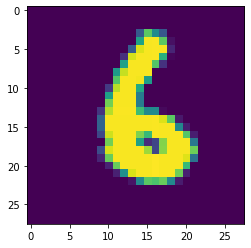

In [14]:
plt.imshow(x_train[36])

In [15]:
#Shaping the data

In [16]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [17]:
# One hot encoding

In [18]:
no_of_classes=10
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [19]:
y_train[36]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
#model Building and adding cnn layers

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [24]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [27]:
# Compiling the Model

In [28]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [29]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [30]:
#Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2920 - accuracy: 0.9330 - val_loss: 0.0849 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0714 - accuracy: 0.9786 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0537 - val_accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0562 - val_accuracy: 0.9851


In [31]:
# Testing the model

In [32]:
prediction = model.predict(x_test[:4])
prediction

array([[4.1380958e-13, 5.5543247e-11, 1.3345504e-09, 3.1425449e-11,
        9.4491831e-14, 7.2925563e-12, 1.7516493e-16, 1.0000000e+00,
        6.3784633e-13, 9.5628028e-12],
       [2.9994555e-07, 2.4356141e-05, 9.9997509e-01, 7.9179052e-10,
        1.3147217e-10, 4.2590156e-10, 1.5016406e-07, 1.2657478e-10,
        6.5452397e-08, 1.2660343e-11],
       [5.6544063e-09, 9.9971086e-01, 8.2644590e-07, 8.5688399e-09,
        6.5433642e-07, 2.7826370e-04, 3.2448411e-06, 4.5385741e-06,
        1.6382492e-08, 1.5008667e-06],
       [1.0000000e+00, 2.3219931e-12, 5.2316273e-11, 2.7361985e-10,
        4.5236664e-08, 3.0010538e-10, 2.2088006e-08, 7.9011971e-12,
        9.5408592e-10, 4.5885631e-08]], dtype=float32)

In [33]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0])

In [34]:
# Observing the metrics

In [35]:

metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.056
 Accuracy: 0.985


In [36]:
# Saving the model

In [37]:
model.save("ibm_mnistcnn.h5")

In [38]:
ls


ibm_mnistcnn.h5


In [39]:
!tar -zcvf handwritten-model.tgz ibm_mnistcnn.h5

ibm_mnistcnn.h5


In [40]:
ls

handwritten-model.tgz  ibm_mnistcnn.h5


In [41]:
# installing watson machine learnig

In [42]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.7 MB/s eta 0:00:01


In [43]:
# setting up API 

In [44]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"uUqRU05zsVaIS2kJLaKuNO7W4mGHGh-N9EF5Y3mb2sOG"
}

client = APIClient(wml_credentials)

In [45]:
def guid_from_space_name(client, Imageclassification):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == Imageclassification)['metadata']['id'])

In [47]:
space_uid = guid_from_space_name(client, "Imageclassification")
space_uid

'6abc45ce-8b78-4d1b-bd30-43612ef28499'

In [48]:
client.set.default_space(space_uid)

'SUCCESS'

In [49]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [50]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid 


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [51]:
model_details = client.repository.store_model(model ='handwritten-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)
model_id

'bc5d0a8f-bbb8-49d0-b3a2-094c6d102716'

In [52]:
client.repository.download(model_id,"model.tar.gz")

Successfully saved model content to file: 'model.tar.gz'


'/home/wsuser/work/model.tar.gz'

In [53]:
ls -l


total 2676
-rw-rw---- 1 wsuser wscommon 880634 Nov 18 16:58 handwritten-model.tgz
-rw-rw---- 1 wsuser wscommon 978400 Nov 18 16:58 ibm_mnistcnn.h5
-rw-rw---- 1 wsuser wscommon 880634 Nov 18 17:03 model.tar.gz


In [54]:
# Testing the model

In [55]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [56]:
model = load_model("ibm_mnistcnn.h5")

In [57]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (8).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [58]:
img = Image.open(streaming_body_1).convert("L")
img = img.resize( (28,28) )
img

In [59]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [60]:
pred = model.predict(im2arr)
print(pred)

[[8.7688470e-08 3.7732332e-15 1.4389747e-09 1.3447071e-07 1.3118169e-09
  7.4132477e-05 9.9992561e-01 2.3259878e-15 4.8670792e-09 2.5315959e-08]]


In [61]:
print(np.argmax(pred, axis=1))

[6]
